### **GAMES RECOMMENDATION SYSTEM:**
## **Project Overview**

* This project develops a game recommendation system using Steam game data as a training set. It employs a Cosine similarity model to calculate similarity scores between games based on the TF-IDF vector representation of the data.The system leverages game descriptions, genres, and tags to construct the TF-IDF vectors, providing a rich feature set for comparison. The TF-IDF (Term Frequency-Inverse Document Frequency) weighting scheme helps to emphasize the importance of unique terms within a game's description while downplaying the impact of common words. This allows for a more nuanced understanding of each game's distinctive characteristics.
  
* The core of the recommendation engine lies in calculating the Cosine similarity between these TF-IDF vectors. Cosine similarity measures the angle between two vectors, providing a score between 0 and 1, where 1 indicates perfect similarity. Games with high Cosine similarity scores are deemed to be more alike and therefore more likely to appeal to the same player.The system then provides game recommendations based on a user's specified game of interest. It identifies the 'n' most similar games to the user's input game, ranked according to their Cosine similarity scores. These top 'n' games are then presented as recommendations, offering users a curated list of titles that align with their gaming preferences, as inferred from the similarity of game features derived from the Steam dataset. Further refinements might include incorporating user reviews and play time data to personalize the recommendations even further.

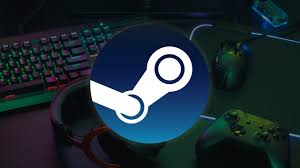
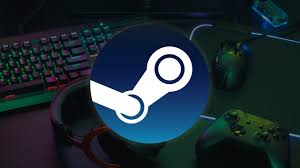

In [417]:
import pandas as pd 
import numpy as np 
import nltk
from nltk.corpus import stopwords 
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.metrics.pairwise import cosine_similarity
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)

### **importing data**

In [418]:
import re

In [419]:
text = 'Oct 21, 2008'
pattern= (r'[0-9]{4}')
re.findall(pattern,text)

['2008']

In [420]:
df = pd.read_csv("/kaggle/input/steam-games-dataset/games.csv")
df.head()

,AppID,Name,Release date,Estimated owners,Peak CCU,Required age,Price,DiscountDLC count,About the game,Supported languages,Full audio languages,Reviews,Header image,Website,Support url,Support email,Windows,Mac,Linux,Metacritic score,Metacritic url,User score,Positive,Negative,Score rank,Achievements,Recommendations,Notes,Average playtime forever,Average playtime two weeks,Median playtime forever,Median playtime two weeks,Developers,Publishers,Categories,Genres,Tags,Screenshots,Movies
20200,Galactic Bowling,"Oct 21, 2008",0 - 20000,0,0,19.99,0,0,Galactic Bowling is an exaggerated and stylize...,['English'],[],NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,http://www.galacticbowling.net,NaN,NaN,True,False,False,0,NaN,0,6,11,NaN,30,0,NaN,0,0,0,0,Perpetual FX Creative,Perpetual FX Creative,"Single-player,Multi-player,Steam Achievements,...","Casual,Indie,Sports","Indie,Casual,Sports,Bowling",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
655370,Train Bandit,"Oct 12, 2017",0 - 20000,0,0,0.99,0,0,THE LAW!! Looks to be a showdown atop a train....,"['English', 'French', 'Italian', 'German', 'Sp...",[],NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,http://trainbandit.com,NaN,support@rustymoyher.com,True,True,False,0,NaN,0,53,5,NaN,12,0,NaN,0,0,0,0,Rusty Moyher,Wild Rooster,"Single-player,Steam Achievements,Full controll...","Action,Indie","Indie,Action,Pixel Graphics,2D,Retro,Arcade,Sc...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
1732930,Jolt Project,"Nov 17, 2021",0 - 20000,0,0,4.99,0,0,Jolt Project: The army now has a new robotics ...,"['English', 'Portuguese - Brazil']",[],NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,NaN,NaN,ramoncampiaof31@gmail.com,True,False,False,0,NaN,0,0,0,NaN,0,0,NaN,0,0,0,0,Campião Games,Campião Games,Single-player,"Action,Adventure,Indie,Strategy",NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
1355720,Henosis™,"Jul 23, 2020",0 - 20000,0,0,5.99,0,0,HENOSIS™ is a mysterious 2D Platform Puzzler w...,"['English', 'French', 'Italian', 'German', 'Sp...",[],NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,https://henosisgame.com/,https://henosisgame.com/,info@henosisgame.com,True,True,True,0,NaN,0,3,0,NaN,0,0,NaN,0,0,0,0,Odd Critter Games,Odd Critter Games,"Single-player,Full controller support","Adventure,Casual,Indie","2D Platformer,Atmospheric,Surreal,Mystery,Puzz...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
1139950,Two Weeks in Painland,"Feb 3, 2020",0 - 20000,0,0,0.00,0,0,ABOUT THE GAME Play as a hacker who has arrang...,"['English', 'Spanish - Spain']",[],NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,https://www.unusual-games.com/home/,https://www.unusual-games.com/contact/,welistentoyou@unusual-games.com,True,True,False,0,NaN,0,50,8,NaN,17,0,This Game may contain content not appropriate ...,0,0,0,0,Unusual Games,Unusual Games,"Single-player,Steam Achievements","Adventure,Indie","Indie,Adventure,Nudity,Violent,Sexual Content,...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...


### **Data Cleaning** 

In [421]:
df = df[1:].reset_index(drop=True)

In [422]:
df.drop('Movies',axis=1,inplace=True)

In [423]:
df.columns[0]

'AppID'

In [424]:
# the column names are misaligned so we need to shift them with one column
len(df.columns)

38

In [425]:
df.head(5)

,AppID,Name,Release date,Estimated owners,Peak CCU,Required age,Price,DiscountDLC count,About the game,Supported languages,Full audio languages,Reviews,Header image,Website,Support url,Support email,Windows,Mac,Linux,Metacritic score,Metacritic url,User score,Positive,Negative,Score rank,Achievements,Recommendations,Notes,Average playtime forever,Average playtime two weeks,Median playtime forever,Median playtime two weeks,Developers,Publishers,Categories,Genres,Tags,Screenshots
0,Train Bandit,"Oct 12, 2017",0 - 20000,0,0,0.99,0,0,THE LAW!! Looks to be a showdown atop a train....,"['English', 'French', 'Italian', 'German', 'Sp...",[],NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,http://trainbandit.com,NaN,support@rustymoyher.com,True,True,False,0,NaN,0,53,5,NaN,12,0,NaN,0,0,0,0,Rusty Moyher,Wild Rooster,"Single-player,Steam Achievements,Full controll...","Action,Indie","Indie,Action,Pixel Graphics,2D,Retro,Arcade,Sc...",https://cdn.akamai.steamstatic.com/steam/apps/...
1,Jolt Project,"Nov 17, 2021",0 - 20000,0,0,4.99,0,0,Jolt Project: The army now has a new robotics ...,"['English', 'Portuguese - Brazil']",[],NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,NaN,NaN,ramoncampiaof31@gmail.com,True,False,False,0,NaN,0,0,0,NaN,0,0,NaN,0,0,0,0,Campião Games,Campião Games,Single-player,"Action,Adventure,Indie,Strategy",NaN,https://cdn.akamai.steamstatic.com/steam/apps/...
2,Henosis™,"Jul 23, 2020",0 - 20000,0,0,5.99,0,0,HENOSIS™ is a mysterious 2D Platform Puzzler w...,"['English', 'French', 'Italian', 'German', 'Sp...",[],NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,https://henosisgame.com/,https://henosisgame.com/,info@henosisgame.com,True,True,True,0,NaN,0,3,0,NaN,0,0,NaN,0,0,0,0,Odd Critter Games,Odd Critter Games,"Single-player,Full controller support","Adventure,Casual,Indie","2D Platformer,Atmospheric,Surreal,Mystery,Puzz...",https://cdn.akamai.steamstatic.com/steam/apps/...
3,Two Weeks in Painland,"Feb 3, 2020",0 - 20000,0,0,0.00,0,0,ABOUT THE GAME Play as a hacker who has arrang...,"['English', 'Spanish - Spain']",[],NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,https://www.unusual-games.com/home/,https://www.unusual-games.com/contact/,welistentoyou@unusual-games.com,True,True,False,0,NaN,0,50,8,NaN,17,0,This Game may contain content not appropriate ...,0,0,0,0,Unusual Games,Unusual Games,"Single-player,Steam Achievements","Adventure,Indie","Indie,Adventure,Nudity,Violent,Sexual Content,...",https://cdn.akamai.steamstatic.com/steam/apps/...
4,Wartune Reborn,"Feb 26, 2021",50000 - 100000,68,0,0.00,0,0,Feel tired of auto-fight? Feel tired of boring...,['English'],[],NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,NaN,https://7.wan.com,https://wartune@7road.com,True,False,False,0,NaN,0,87,49,NaN,0,0,NaN,0,0,0,0,7Road,7Road,"Single-player,Multi-player,MMO,PvP,Online PvP,...","Adventure,Casual,Free to Play,Massively Multip...","Turn-Based Combat,Massively Multiplayer,Multip...",https://cdn.akamai.steamstatic.com/steam/apps/...


In [426]:
corr_columns = ['Name', 'Release date', 'Estimated owners', 'Peak CCU',
       'Required age', 'Price', 'Unnamed']

df.rename(columns=dict(zip(df.columns[:7], corr_columns)), inplace=True)

In [427]:
df.head()

,Name,Release date,Estimated owners,Peak CCU,Required age,Price,Unnamed,DiscountDLC count,About the game,Supported languages,Full audio languages,Reviews,Header image,Website,Support url,Support email,Windows,Mac,Linux,Metacritic score,Metacritic url,User score,Positive,Negative,Score rank,Achievements,Recommendations,Notes,Average playtime forever,Average playtime two weeks,Median playtime forever,Median playtime two weeks,Developers,Publishers,Categories,Genres,Tags,Screenshots
0,Train Bandit,"Oct 12, 2017",0 - 20000,0,0,0.99,0,0,THE LAW!! Looks to be a showdown atop a train....,"['English', 'French', 'Italian', 'German', 'Sp...",[],NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,http://trainbandit.com,NaN,support@rustymoyher.com,True,True,False,0,NaN,0,53,5,NaN,12,0,NaN,0,0,0,0,Rusty Moyher,Wild Rooster,"Single-player,Steam Achievements,Full controll...","Action,Indie","Indie,Action,Pixel Graphics,2D,Retro,Arcade,Sc...",https://cdn.akamai.steamstatic.com/steam/apps/...
1,Jolt Project,"Nov 17, 2021",0 - 20000,0,0,4.99,0,0,Jolt Project: The army now has a new robotics ...,"['English', 'Portuguese - Brazil']",[],NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,NaN,NaN,ramoncampiaof31@gmail.com,True,False,False,0,NaN,0,0,0,NaN,0,0,NaN,0,0,0,0,Campião Games,Campião Games,Single-player,"Action,Adventure,Indie,Strategy",NaN,https://cdn.akamai.steamstatic.com/steam/apps/...
2,Henosis™,"Jul 23, 2020",0 - 20000,0,0,5.99,0,0,HENOSIS™ is a mysterious 2D Platform Puzzler w...,"['English', 'French', 'Italian', 'German', 'Sp...",[],NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,https://henosisgame.com/,https://henosisgame.com/,info@henosisgame.com,True,True,True,0,NaN,0,3,0,NaN,0,0,NaN,0,0,0,0,Odd Critter Games,Odd Critter Games,"Single-player,Full controller support","Adventure,Casual,Indie","2D Platformer,Atmospheric,Surreal,Mystery,Puzz...",https://cdn.akamai.steamstatic.com/steam/apps/...
3,Two Weeks in Painland,"Feb 3, 2020",0 - 20000,0,0,0.00,0,0,ABOUT THE GAME Play as a hacker who has arrang...,"['English', 'Spanish - Spain']",[],NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,https://www.unusual-games.com/home/,https://www.unusual-games.com/contact/,welistentoyou@unusual-games.com,True,True,False,0,NaN,0,50,8,NaN,17,0,This Game may contain content not appropriate ...,0,0,0,0,Unusual Games,Unusual Games,"Single-player,Steam Achievements","Adventure,Indie","Indie,Adventure,Nudity,Violent,Sexual Content,...",https://cdn.akamai.steamstatic.com/steam/apps/...
4,Wartune Reborn,"Feb 26, 2021",50000 - 100000,68,0,0.00,0,0,Feel tired of auto-fight? Feel tired of boring...,['English'],[],NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,NaN,https://7.wan.com,https://wartune@7road.com,True,False,False,0,NaN,0,87,49,NaN,0,0,NaN,0,0,0,0,7Road,7Road,"Single-player,Multi-player,MMO,PvP,Online PvP,...","Adventure,Casual,Free to Play,Massively Multip...","Turn-Based Combat,Massively Multiplayer,Multip...",https://cdn.akamai.steamstatic.com/steam/apps/...


In [428]:
df['year'] = df['Release date'].str.extract(r'(\d{4})')

In [429]:
data = df[['Name','Tags','About the game','year','Header image',"Categories"]]
data.head(3)

,Name,Tags,About the game,year,Header image,Categories
0,Train Bandit,"Indie,Action,Pixel Graphics,2D,Retro,Arcade,Sc...",THE LAW!! Looks to be a showdown atop a train....,2017,https://cdn.akamai.steamstatic.com/steam/apps/...,"Single-player,Steam Achievements,Full controll..."
1,Jolt Project,NaN,Jolt Project: The army now has a new robotics ...,2021,https://cdn.akamai.steamstatic.com/steam/apps/...,Single-player
2,Henosis™,"2D Platformer,Atmospheric,Surreal,Mystery,Puzz...",HENOSIS™ is a mysterious 2D Platform Puzzler w...,2020,https://cdn.akamai.steamstatic.com/steam/apps/...,"Single-player,Full controller support"


<Axes: xlabel='year'>

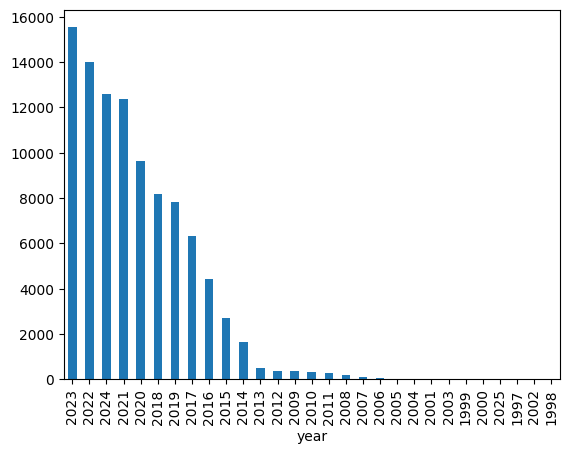

In [430]:
data['year'].value_counts().plot(kind='bar')

**We will only use games from 2018-2024.**

In [431]:
data['year'] = data['year'].astype(int)

In [432]:
data = data[data['year'] > 2018]

In [433]:
data.shape

(71979, 6)

<Axes: >

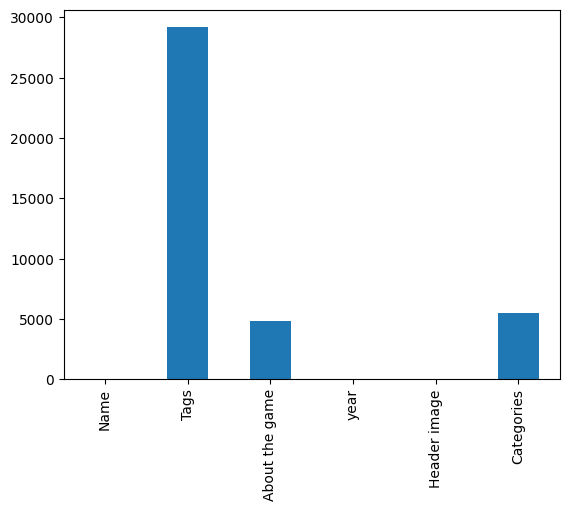

In [434]:
data.isna().sum().plot(kind='bar')

In [435]:
data.dropna(axis=0,inplace=True)

<Axes: >

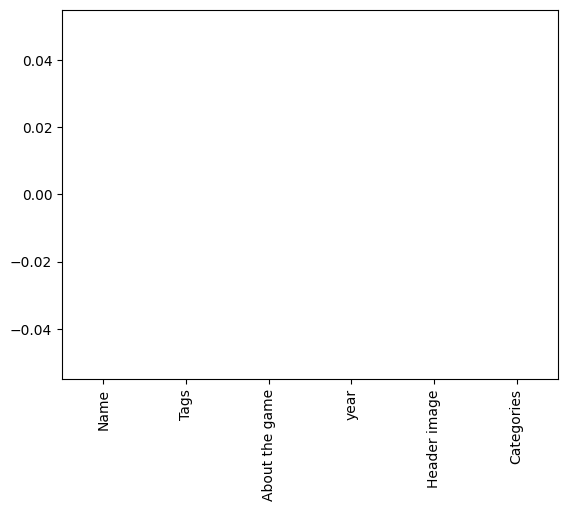

In [436]:
data.isna().sum().plot(kind='bar')

In [437]:
data.head()

,Name,Tags,About the game,year,Header image,Categories
2,Henosis™,"2D Platformer,Atmospheric,Surreal,Mystery,Puzz...",HENOSIS™ is a mysterious 2D Platform Puzzler w...,2020,https://cdn.akamai.steamstatic.com/steam/apps/...,"Single-player,Full controller support"
3,Two Weeks in Painland,"Indie,Adventure,Nudity,Violent,Sexual Content,...",ABOUT THE GAME Play as a hacker who has arrang...,2020,https://cdn.akamai.steamstatic.com/steam/apps/...,"Single-player,Steam Achievements"
4,Wartune Reborn,"Turn-Based Combat,Massively Multiplayer,Multip...",Feel tired of auto-fight? Feel tired of boring...,2021,https://cdn.akamai.steamstatic.com/steam/apps/...,"Single-player,Multi-player,MMO,PvP,Online PvP,..."
5,TD Worlds,"Tower Defense,Rogue-lite,RTS,Replay Value,Perm...","TD Worlds is a dynamic, highly strategical gam...",2022,https://cdn.akamai.steamstatic.com/steam/apps/...,"Single-player,Steam Achievements,Steam Cloud"
7,MazM: Jekyll and Hyde,"Adventure,Simulation,RPG,Strategy,Singleplayer...",'MazM: Jekyll and Hyde' is a darkly entertaini...,2020,https://cdn.akamai.steamstatic.com/steam/apps/...,"Single-player,Steam Achievements,Full controll..."


In [438]:
data.drop_duplicates(inplace=True)

In [439]:
data.reset_index(drop=True,inplace=True)

In [440]:
data['Name'] = data['Name'].str.replace(r'[^a-zA-Z0-9\s]','',regex=True).str.strip().str.lower()

In [441]:
data['About the game'] = data['About the game'].str.replace(r'[^a-zA-Z\s]','',regex=True).str.strip().str.lower()

In [442]:
data['About the game']

0        henosis is a mysterious d platform puzzler whe...
1        about the game play as a hacker who has arrang...
2        feel tired of autofight feel tired of boring n...
3        td worlds is a dynamic highly strategical game...
4        mazm jekyll and hyde is a darkly entertaining ...
                               ...                        
42203    incel simulator is a card game in which you ma...
42204    this game is a classic adventure game where yo...
42205    an alchemist a former apothecary now chased by...
42206    are you afraid of monsters western fantasy wor...
42207    guide the colorful slime to the goal all you h...
Name: About the game, Length: 42208, dtype: object

#### *After cleaning the data, we will combine relevant features for TF-IDF, weighting each feature to control its influence on similarity calculations.*

In [443]:
data.columns

Index(['Name', 'Tags', 'About the game', 'year', 'Header image', 'Categories'], dtype='object')

## **Data preprocessing**

In [444]:
data['Tags'] = data['Tags'].apply(lambda x : set(x.lower().split()))

In [445]:
data['Tags'][:3]

0    {manipulation,casual,indie, 2d, platformer,puz...
1    {indie,adventure,nudity,violent,sexual, rich, ...
2    {co-op,co-op, game,strategy,2.5d,magic,medieva...
Name: Tags, dtype: object

### **Converting Games data into vectors**

Now, we need to convert the combined column into a vector using TF-IDF (Term Frequency-Inverse Document Frequency).
This method vectorizes sentences by converting words into numerical values based on their frequency.

* TF (Term Frequency): Counts how often a word appears in a game’s description.

* IDF (Inverse Document Frequency): Reduces the importance of words that appear frequently across all games.

* Effect: This approach gives higher weight to rare words and lowers the influence of common words, improving the accuracy of similarity-based recommendations.

In [446]:
# due to memory allocation problem i will reduce the data size to 33300 row to prevent the notebook from crashing
data = data.iloc[:33300]

In [447]:
data['combined'] = data['Name']+' '+data["Categories"]

In [448]:
vectorizer = TfidfVectorizer(stop_words='english')
games_vector = vectorizer.fit_transform(data['combined'])

In [449]:
data.shape

(33300, 7)

### **creating the simularity matrix using the Cosine model**

## 🎮 Computing Similarity Scores with Cosine Similarity  

We compute **similarity scores** using **cosine similarity**, which measures the angle between two vectors.  

### 🧮 Cosine Similarity Formula  
\[
\cos(\theta) = \frac{A \cdot B}{||A|| \times ||B||}
\]
where:  
- \( A \) and \( B \) are TF-IDF vectors of two games.  
- \( ||A|| \) and \( ||B|| \) are their magnitudes.  
- **A higher cosine similarity** (closer to 1) means the games are more similar.  

### 🔥 Why Cosine Similarity?  
✅ **Ignores magnitude differences** and focuses on the direction of the vectors.  
✅ Works well when comparing **text-based data** like game descriptions.  

### 🛠 Handling Memory Issues  
Since computing similarity for **thousands of games** requires a **large similarity matrix**, we **process data in chunks** to:  
1. **Reduce memory allocation** (avoiding crashes).  
2. **Improve efficiency** by handling smaller portions at a time.  
3. **Monitor progress** using `tqdm` to track computation speed.  

### 🚀 Final Summary  
We compute **cosine similarity** to measure game similarities.  
To **avoid memory issues**, we process data in **chunks** and use **Tqdm** to monitor progress.  


In [450]:
from scipy.sparse import csr_matrix
from tqdm.auto import tqdm

# Convert to a sparse matrix if not already
games_vector_sparse = csr_matrix(games_vector)

# Get number of rows correctly
num_rows = games_vector_sparse.shape[0]  

chunk_size = 900
num_chunks = (num_rows // chunk_size)   

# Initialize similarity matrix
sim_matrix = np.zeros((num_rows, num_rows))

# Compute cosine similarity in chunks
for i in tqdm(range(num_chunks), desc="Computing Cosine Similarity"):
    start = i * chunk_size
    end = min((i + 1) * chunk_size, num_rows)  
    
    chunk_sim = cosine_similarity(games_vector_sparse[start:end], games_vector_sparse)
    
    sim_matrix[start:end, :] = chunk_sim  


Computing Cosine Similarity:   0%|          | 0/37 [00:00<?, ?it/s]

#### *We will now build a recommendation function that finds the top 5 most similar games using the similarity matrix score. This function first checks if the game is available in the dataset. If not, it uses the `corrected_name` function, leveraging TheFuzz library to correct potential misspellings by comparing the user's input to the list of game names. The function will inform the user of the corrected game name used in each instance.*

In [451]:
pip install TheFuzz

Note: you may need to restart the kernel to use updated packages.


In [452]:
from thefuzz  import process

In [453]:
def correct_name(title,threshold=80):
    game_names = data['Name'].tolist()
    best_match,score = process.extractOne(title,game_names)

    if score >= threshold :
        return best_match 
    else  : 
        return None

In [454]:
# testing 
correct_name('balck mansion')

'black mansion'

In [455]:
import numpy as np
def jaccard_similarity(set1, set2):
    intersection = len(set1 & set2)
    union = len(set1 | set2)
    return intersection/union if union !=0 else 0

def recommend_game(title, n_recommendation=5, alpha=0.3):
    # Normalize input title and dataset titles
    title = title.lower().strip()
    data['Name'] = data['Name'].str.lower().str.strip()

    # Check if the title exists in the dataset
    if title not in data['Name'].values:
        corr_title = correct_name(title)
        if corr_title in data['Name'].values:
            title = corr_title
        else:
            return "Game not found. Please check the name and try again."

    # Find the index of the given game title
    g_idx = data[data['Name'] == title].index[0]
    jaccard_scores = []

    # Compute Jaccard similarity scores
    for idx in range(len(data)):
        if idx == g_idx:
            jaccard_scores.append(0)
        else:
            jaccard_scores.append(jaccard_similarity(data.loc[g_idx, 'Tags'], data.loc[idx, 'Tags']))

    jaccard_scores = np.array(jaccard_scores)

    # Normalize the scores
    if np.max(jaccard_scores) > 0:
        jaccard_scores /= np.max(jaccard_scores)

    # Get cosine similarity scores
    cosine_scores = sim_matrix[g_idx]
    if np.max(cosine_scores) > 0:
        cosine_scores /= np.max(cosine_scores)

    # Combine both scores
    final_score = alpha * cosine_scores + (1 - alpha) * jaccard_scores
    recomm_idx = final_score.argsort()[::-1][1:n_recommendation+1]  # Fix indexing

    similar_games = data.iloc[recomm_idx]['Name'].tolist()
    output = f"**Recommended games for '{title}':**\n\n"
    game_list = []
    for idx in recomm_idx:
            game_name = data['Name'].iloc[idx]  # Get the game name
            game_image = data['Header image'].iloc[idx]  # Get the image URL
            game_list.append((game_image, game_name))

    
    return output, game_list

In [456]:
title = 'forza horison 4'
recommend_game(title)

("**Recommended games for 'forza horizon 4':**\n\n",
 [('https://cdn.akamai.steamstatic.com/steam/apps/346820/header.jpg?t=1627370726',
   'crash drive 3'),
  ('https://cdn.akamai.steamstatic.com/steam/apps/1222680/header.jpg?t=1649949359',
   'need for speed heat'),
  ('https://cdn.akamai.steamstatic.com/steam/apps/1902830/header.jpg?t=1653299869',
   'night racer'),
  ('https://cdn.akamai.steamstatic.com/steam/apps/1846380/header.jpg?t=1669984763',
   'need for speed unbound'),
  ('https://cdn.akamai.steamstatic.com/steam/apps/1591870/header.jpg?t=1639281773',
   'drift phonk 666')])

In [457]:
import gradio as gr

In [458]:
iface = gr.Interface(
    fn=recommend_game,
    inputs=gr.Textbox(label="Enter Game Title"),  # Updated input definition
    outputs=[gr.Markdown(), gr.Gallery(label="Recommended Games")],  # Updated output definition
    title="Game Recommendation System",
    description="Enter a game title to get recommendations.",
    theme='white'
)

# Launch the interface
iface.launch()

* Running on local URL:  http://127.0.0.1:7872
Kaggle notebooks require sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

* Running on public URL: https://be89493b85f1d0b724.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
